In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from childes_mi.utils.paths import PHONBANK_DFS, DATA_DIR
from childes_mi.utils.general import flatten

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [5]:
phone_df = pd.read_pickle(PHONBANK_DFS/'phone_df.pickle')

In [6]:
phone_df['n_phones'] = [len(list(flatten(i))) for i in phone_df.phones.values]

In [7]:
phone_df[:3]

,name,transcript_id,age,dataset,language,sex,phones,orthography,xml_loc,n_phones
0,0,020926,2.833,Providence,eng,male,"[[ˈhi, ˈhæ, rəs], [ˈhi, ˈhæ, rəs], [ˈkævəʔ, ˈp...","[[[can, I], have, this], [[can, I], have, this...",/mnt/cube/tsainbur/Projects/github_repos/child...,1772
0,0,030006,3.000,Providence,eng,male,"[[*, haʊ, ˈbaʊ, *, ɪ, ˈdeɪ, mætʃ], [deɪ, ˈmætʃ...","[[xxx, how, <a>bout, xxx, if, they, match], [t...",/mnt/cube/tsainbur/Projects/github_repos/child...,2277
0,0,011117,2.000,Providence,eng,male,"[[None], [None], [None], [hɪ, ˈmi], [ˈbu], [No...","[[xxx], [xxx], [xxx], [help, me], [bowl], [xxx...",/mnt/cube/tsainbur/Projects/github_repos/child...,561


In [8]:
phone_df.dataset.unique()

array(['Providence', 'Davis', 'Goad'], dtype=object)

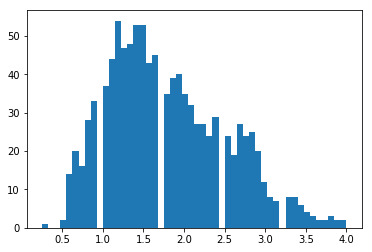

In [9]:
plt.hist(phone_df.age.values, bins = 50);

In [10]:
print("There are {} phones in this dataset".format(np.sum(phone_df.n_phones)))

There are 618583 phones in this dataset


/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


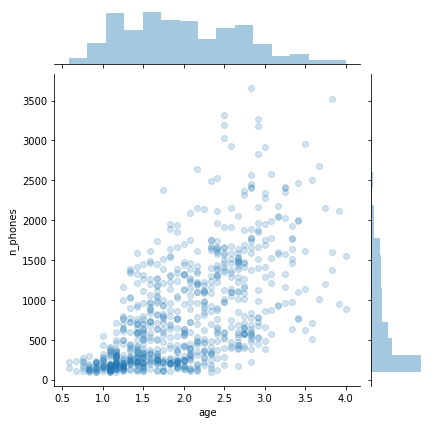

In [11]:
import seaborn as sns
sns.jointplot("age", "n_phones", data=phone_df[phone_df.n_phones > 100], alpha=0.2)

In [12]:
phone_df[:3]

,name,transcript_id,age,dataset,language,sex,phones,orthography,xml_loc,n_phones
0,0,020926,2.833,Providence,eng,male,"[[ˈhi, ˈhæ, rəs], [ˈhi, ˈhæ, rəs], [ˈkævəʔ, ˈp...","[[[can, I], have, this], [[can, I], have, this...",/mnt/cube/tsainbur/Projects/github_repos/child...,1772
0,0,030006,3.000,Providence,eng,male,"[[*, haʊ, ˈbaʊ, *, ɪ, ˈdeɪ, mætʃ], [deɪ, ˈmætʃ...","[[xxx, how, <a>bout, xxx, if, they, match], [t...",/mnt/cube/tsainbur/Projects/github_repos/child...,2277
0,0,011117,2.000,Providence,eng,male,"[[None], [None], [None], [hɪ, ˈmi], [ˈbu], [No...","[[xxx], [xxx], [xxx], [help, me], [bowl], [xxx...",/mnt/cube/tsainbur/Projects/github_repos/child...,561


In [13]:
np.median(phone_df.n_phones)

306.0

In [14]:
age_cohorts = [[0.5, 1], [1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 20]]

In [23]:
from pylatexenc.latexencode import unicode_to_latex

In [26]:
for (age_cohort_low, age_cohort_high) in tqdm(age_cohorts):
    cohort_subset = phone_df[
        (phone_df.age >= age_cohort_low) & (phone_df.age < age_cohort_high)
    ]
    print("------Age: {}-{} | # transcripts: {}------\n ".format(age_cohort_low, age_cohort_high, len(cohort_subset)))

    row = cohort_subset.iloc[np.random.randint(len(cohort_subset))]
    trans = row.phones
    orthography = row.orthography
    corpus_name = '/'.join(row.xml_loc.as_posix().split('/')[-3:])
    print(corpus_name, row.age, 'years')
    for sent, orth in zip(trans, orthography):
        sent = [word for word in sent if word not in ['xxx', None]]
        if len(sent) == 0:
            continue
        print('\t {} ({})'.format(' '.join(flatten(sent)), ' '.join(flatten(orth))))
    print('\n\n')

------Age: 0.5-1 | # transcripts: 113------
 
Davis/Cameron/001013.xml 0.833 years
	 ba (xxx)
	 boː (xxx)
	 ʌmː (xxx)
	 ba (xxx)
	 gu (xxx)
	 baba (byebye)
	 bo (bear)
	 mːo (xxx)
	 ba (xxx)
	 tu (xxx)
	 do (xxx)
	 gu (xxx)
	 əgu (xxx)
	 ənʌ (xxx)
	 nːo (xxx)
	 bɪmba (xxx)
	 bʌba (xxx)
	 mːæ (xxx)
	 dædo (xxx)
	 dædædæd̥ (xxx)
	 bababwa (xxx)
	 bababa (xxx)
	 wæ (xxx)
	 wæ (xxx)
	 ijæ (xxx)
	 go (go)
	 wːæ (xxx)
	 wæ (xxx)
	 əwæ (xxx)
	 əwæˈ (xxx)
	 əwæ (xxx)
	 wæ (xxx)
	 wæ (xxx)
	 ba (xxx)
	 ba (ball)
	 baba (xxx)
	 wæ (xxx)
	 wʌ (xxx)
	 baba (xxx)
	 bʌbʌbə (xxx)
	 baba (xxx)
	 mːdæ (xxx)
	 ba (xxx)
	 bababʌ (xxx)
	 guʔ (xxx)
	 gʊ (xxx)
	 ba (ball)
	 gɨ (xxx)
	 wa (xxx)
	 mama (xxx)
	 bə (bug)
	 gowauwau (xxx)
	 bagaga (xxx)
	 bʌwʌwʌ (xxx)
	 gowʌwʌ (xxx)
	 gowowə (xxx)
	 wowʌ (xxx)
	 wiː (xxx)
	 bo (xxx)
	 ba (xxx)
	 me (xxx)
	 bwɛmʌmʌ (xxx)
	 meː (xxx)
	 gau (xxx)
	 mʌmʌmʌm (xxx)
	 gau (xxx)
	 gu (xxx)
	 ʌːmʌm (xxx)
	 go (xxx)
	 ʌbʌ (xxx)
	 bæbæbəbʌbʌbə (xxx)
	 di (xxx)
	 mɛ (xxx)
	